## Домашнее задание к уроку 2 <a class='anchor' id='hw'>

In [8]:
# Загрузка необходимых библиотек

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [5]:
# Загрузка данных

X = np.array([[1, 1, 500, 1],
              [1, 1, 700, 1],
              [1, 2, 750, 2], 
              [1, 5, 600, 1], 
              [1, 3,1450, 2], 
              [1, 0, 800, 1], 
              [1, 5,1500, 1], 
              [1,10,2000, 3], 
              [1, 1, 450, 1], 
              [1, 2,1000, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

n = 50

In [6]:
# Разбитие на train и test

train_n = 5

train_X = X[:train_n]
train_y = y[:train_n]
test_X = X[train_n:]
test_y = y[train_n:]

In [7]:
# zeros & logspace

cf = np.zeros((n, train_X.shape[1]))
a_list = np.logspace(-3, 2, n)

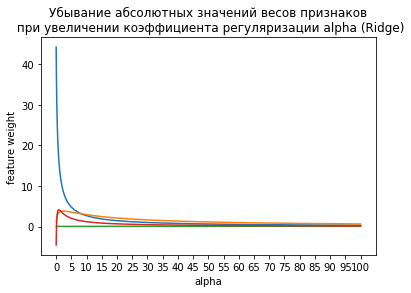

In [9]:
for i, val in enumerate(a_list):
    
    ridge = Ridge(alpha = val, fit_intercept = False)
    ridge.fit(train_X, train_y)
    
    cf[i, :] = ridge.coef_.flatten()

for i in range(train_X.shape[1]):
    
    plt.plot(a_list, cf[:, i])
    
# График

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 101, 5))
plt.xlabel('alpha')
plt.ylabel('feature weight');

**Результат**

- Чем больше коэффициент регуляризации, тем быстрее веса стремятся к нулю
- Чем меньше коэффициент регуляризации, тем быстрее веса стремятся к бесконечности

---

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [10]:
# Функция для L1-регуляризации

def gradient_descent_reg_l1(X, y, iterations, eta = 1e-4,reg = 1):
    
    W = np.random.random(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        # Градиент функции ошибки
        
        dQ = 2/n * X.T @ (y_pred - y)
        
        # Изменено
        
        dReg = reg * (W / abs(W))
        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    
    return W

In [15]:
# Подготовка данных

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.74535599],
       [ 1.        , -0.70710678, -0.56713087, -0.74535599],
       [ 1.        , -0.35355339, -0.46401617,  0.74535599],
       [ 1.        ,  0.70710678, -0.77336028, -0.74535599],
       [ 1.        ,  0.        ,  0.97958969,  0.74535599],
       [ 1.        , -1.06066017, -0.36090146, -0.74535599],
       [ 1.        ,  0.70710678,  1.08270439, -0.74535599],
       [ 1.        ,  2.47487373,  2.11385144,  2.23606798],
       [ 1.        , -0.70710678, -1.08270439, -0.74535599],
       [ 1.        , -0.35355339,  0.05155735,  0.74535599]])

In [16]:
# Проверка кода

gradient_descent_reg_l1(X_st, y, iterations = 5000, eta = 1e-2, reg = 1e-4)

Iter: 0, weights: [1.8629504  0.97963999 0.84066434 0.39781424], error 3236.1472166600115
Iter: 500, weights: [56.49770857  7.09548334  6.03769688 -1.67120424], error 32.14609933787083
Iter: 1000, weights: [56.49994991  7.09489061  6.17483315 -1.81778865], error 32.13273922009584
Iter: 1500, weights: [56.49995     7.08579869  6.19038904 -1.82506613], error 32.13263634093562
Iter: 2000, weights: [56.49995     7.08438116  6.19239957 -1.82575552], error 32.13263448095613
Iter: 2500, weights: [56.49995     7.08418757  6.19266603 -1.82584096], error 32.13263443436357
Iter: 3000, weights: [56.49995     7.08416167  6.1927015  -1.8258522 ], error 32.132634431729514
Iter: 3500, weights: [56.49995     7.08415822  6.19270622 -1.82585369], error 32.13263443144216
Iter: 4000, weights: [56.49995     7.08415776  6.19270685 -1.82585389], error 32.132634431405
Iter: 4500, weights: [56.49995     7.08415769  6.19270693 -1.82585392], error 32.132634431400035
Final MSE: 32.13263443139944


array([56.49995   ,  7.08415769,  6.19270695, -1.82585392])

---

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Существуют различные ситуации, когда целесообразно применять тот или иной метод масштабирования. Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние. Стандартизировать полезно признаки для модели, которая опирается на распределение.

**Ответ:** В результате останется последний примененный вариант. Изменение данных возможно либо от 0 до 1, либо среднее в нуле + std

---

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

---

## Домашнее задание к уроку 1

**Дополнительное задание 3**

Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога $\epsilon$.

Number of objects = 10        
Learning rate = 0.065        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 8.163 22.6  ], MSE = 3173.15
Iteration #5: W_new = [16.57910992  0.19453005], MSE = 1955.21
Iteration #10: W_new = [28.1771364 15.091221 ], MSE = 1231.96
Iteration #15: W_new = [31.72062016  0.51427744], MSE = 793.75
Iteration #20: W_new = [38.00160391 10.73107964], MSE = 523.35
Iteration #25: W_new = [39.33646941  1.18835696], MSE = 353.82
Iteration #30: W_new = [42.80361306  8.14438367], MSE = 246.11
Iteration #35: W_new = [43.18274891  1.86721316], MSE = 176.91
Iteration #40: W_new = [45.1368308   6.57845598], MSE = 132.06
Iteration #45: W_new = [45.13559384  2.43411835], MSE = 102.78
Iteration #50: W_new = [46.26106417  5.61295573], MSE = 83.56
Iteration #55: W_new = [46.1338848   2.86908343], MSE = 70.9
Iteration #60: W_new = [46.79632     5.00805998], MSE = 62.52
Iteration #65: W_new = [46.64864238  3.1875454 ], MSE = 56.97
Iteration #70: W_new = [47.04672479  4.6239

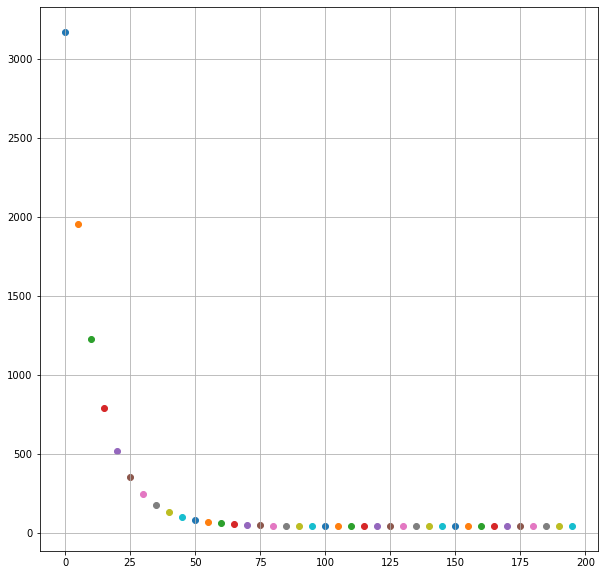

In [27]:
# Подготовка данных (второе задание)

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Значения для X и y

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],[1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

n = X.shape[1]

eta = 0.065
n_iter = 200

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')


# График

plt.figure(figsize=(10, 10))
plt.grid(True)
xlable = 'n_iter'
ylabel = 'MSE'


for i in range(n_iter):
    
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (eta * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1)))
    
    if i % 0.625 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        plt.scatter(i, err)

---

**Решение 3**

In [21]:
# Определение значений для ошибок, eta, критерия сходимости и начальной разницы весов

errors = [err.copy()]

eta = 8e-2 

min_w_distance = 1e-7
w_distance = np.inf

In [38]:
# Градиентный спуск

i = 1

while w_distance > min_w_distance:
    
    for k in range(i):
        
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        
        W[0]= W[0] - np.array([eta * (1/n * 2 * np.dot(X[0,:], (y_pred - y)))])
        W[1]= W[1] - np.array([eta * (1/n * 2 * np.dot(X[1,:], (y_pred - y)))])
        
        errors.append(err)
        er = np.array(errors, dtype = object)
        eta /= 1.1
        
        
        w_distance = abs(er[k] - er[k-1])        
        print(w_distance)
        i = +1
        print(f'Iteration #{i}: W_new = {W}, MSE = {(err)}')

212.64268275494697
Iteration #1: W_new = [53.896  44.8136], MSE = 258.5804
25888.248380290963
Iteration #1: W_new = [ -28.29408    -402.10142545], MSE = 25934.186097536014
2571909.4607355874
Iteration #1: W_new = [ 719.57883648 3646.92033959], MSE = 2571955.3984528324
206952929.85295868
Iteration #1: W_new = [ -5377.59424807 -29372.48878614], MSE = 206952975.79067594
13457514026.31208
Iteration #1: W_new = [ 39320.6996346 212687.4695897], MSE = 13457514072.249798
705397798345.8555
Iteration #1: W_new = [ -254872.18116357 -1380492.81494605], MSE = 705397798391.7932
29719203726799.78
Iteration #1: W_new = [1481093.28658981 8020501.07427937], MSE = 29719203726845.72
1003157142306190.2
Iteration #1: W_new = [ -7687744.48045854 -41632669.54945551], MSE = 1003157142306236.2
2.7029312107659564e+16
Iteration #1: W_new = [3.55790396e+07 1.92675436e+08], MSE = 2.702931210765961e+16
5.789206949696783e+17
Iteration #1: W_new = [-1.46455572e+08 -7.93119693e+08], MSE = 5.789206949696783e+17
9.809432

KeyboardInterrupt: 

In [ ]:
# Проблема: бесконечный цикл!!!